## Task 1

Create a graph using the networkX library to model a real-world network (e.g., a city's transportation network, a social network, or an Internet topology).

 📖 The real network can be chosen at your discretion if you cannot come up with your network close to reality.



Visualize the created graph, and analyze the main characteristics (for example, the number of vertices and edges, the degree of vertices).

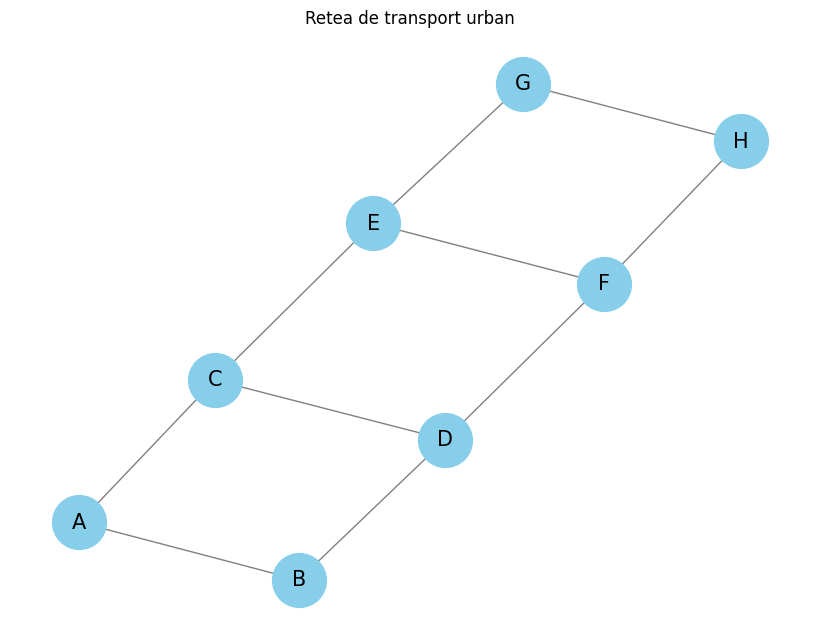

Numarul de noduri: 8
Numarul de muchii: 10
Gradele nodurilor: {'A': 2, 'B': 2, 'C': 3, 'D': 3, 'E': 3, 'F': 3, 'G': 2, 'H': 2}


In [9]:
import networkx as nx
import matplotlib.pyplot as plt

#Crearea unui graf
G= nx.Graph()

#Adaugarea nodurilor(Statii)
statii=["A","B","C","D","E","F","G","H"]
G.add_nodes_from(statii)

#Adaugarea muchiilor(rute intre statii)
rute = [
    ("A","B"),
    ("A","C"),
    ("B","D"),
    ("C","D"),
    ("C","E"),
    ("D","F"),
    ("E","F"),
    ("E","G"),
    ("F","H"),
    ("G","H"),
]
G.add_edges_from(rute)

#Vizualiazarea graficului
plt.figure(figsize=(8,6))
nx.draw(G,with_labels=True,node_color='skyblue',node_size=1500,edge_color='gray',font_size=15)
plt.title("Retea de transport urban")
plt.show()

#Analizarea caracteristicilor principale 
numar_noduri= G.number_of_nodes()
numar_muchii=G.number_of_edges()
grade = dict(G.degree())

print(f"Numarul de noduri: {numar_noduri}")
print(f"Numarul de muchii: {numar_muchii}")
print(f"Gradele nodurilor: {grade}")



## Task 2

Write a program that uses the DFS and BFS algorithms to find paths in the graph that you developed in the first task.

Then compare the results of both algorithms for this graph, highlighting the difference in the paths obtained. Please explain why the paths for the algorithms are the way they are.

In [10]:
#DFS implementation
def dfs(graph,start,goal,path=None):
    if path is None:
        path=[]
    path=path + [start]
    if start == goal:
        return path
    if start not in graph:
        return None
    for node in graph[start]:
        if node not in path:
            newpath=dfs(graph,node,goal,path)
            return newpath
    return None

#BFS implementation
def bfs(graph,start,goal):
    queue=[(start,[start])]
    while queue:
        (vertex,path)=queue.pop(0)
        for next in set(graph[vertex]) - set(path):
            if next==  goal:
                return path+[next]
            else:
                queue.append((next,path + [next]))
    return None
    
#Convert NetworkX graph to adjancency list
adj_list={node: list(neighbors) for node,neighbors in G.adjacency()}

#Find path using DFS and BFS
start_node="A"
end_node="H"

path_dfs=dfs(adj_list,start_node,end_node)
path_bfs=bfs(adj_list,start_node,end_node)

print(f"Path found by DFS: {path_dfs}")
print(f"Path found by BFS: {path_bfs}")

Path found by DFS: ['A', 'B', 'D', 'C', 'E', 'F', 'H']
Path found by BFS: ['A', 'C', 'E', 'G', 'H']


## Task 3

Implement Dijkstra's algorithm to find the shortest path in the developed graph: add weights to the edges and find the shortest path between all graph vertices.



In [12]:
#Adaugarea greutatiilor la muchii
muchii_cu_greutate=[
    ("A","B",1),
    ("A","C",2),
    ("B","D",2),
    ("C","D",1),
    ("C","E",3),
    ("D","F",1),
    ("E","F",2),
    ("E","G",2),
    ("F","H",1),
    ("G","H",3),
]
G_cu_greutate=nx.Graph()
G_cu_greutate.add_weighted_edges_from(muchii_cu_greutate)

#Implementarea algoritmului Dijkstra folosind NetworkX
drumuri_cele_mai_scurte=dict(nx.all_pairs_dijkstra_path(G_cu_greutate))
lungimi_drumuri_cele_mai_scurte=dict(nx.all_pairs_dijkstra_path_length(G_cu_greutate))

#Afisarea drumurilor cele mai scurte si lungimile acestor
for sursa in drumuri_cele_mai_scurte:
    for destinatie in drumuri_cele_mai_scurte[sursa]:
        print(f"Drumul cel mai scurt de la {sursa} la {destinatie}: {drumuri_cele_mai_scurte[sursa][destinatie]} cu lungimea {lungimi_drumuri_cele_mai_scurte[sursa][destinatie]}")

Drumul cel mai scurt de la A la A: ['A'] cu lungimea 0
Drumul cel mai scurt de la A la B: ['A', 'B'] cu lungimea 1
Drumul cel mai scurt de la A la C: ['A', 'C'] cu lungimea 2
Drumul cel mai scurt de la A la D: ['A', 'B', 'D'] cu lungimea 3
Drumul cel mai scurt de la A la E: ['A', 'C', 'E'] cu lungimea 5
Drumul cel mai scurt de la A la F: ['A', 'B', 'D', 'F'] cu lungimea 4
Drumul cel mai scurt de la A la H: ['A', 'B', 'D', 'F', 'H'] cu lungimea 5
Drumul cel mai scurt de la A la G: ['A', 'C', 'E', 'G'] cu lungimea 7
Drumul cel mai scurt de la B la B: ['B'] cu lungimea 0
Drumul cel mai scurt de la B la A: ['B', 'A'] cu lungimea 1
Drumul cel mai scurt de la B la D: ['B', 'D'] cu lungimea 2
Drumul cel mai scurt de la B la C: ['B', 'A', 'C'] cu lungimea 3
Drumul cel mai scurt de la B la F: ['B', 'D', 'F'] cu lungimea 3
Drumul cel mai scurt de la B la E: ['B', 'D', 'F', 'E'] cu lungimea 5
Drumul cel mai scurt de la B la H: ['B', 'D', 'F', 'H'] cu lungimea 4
Drumul cel mai scurt de la B la G: 